In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load and explore data
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [16]:
# Function to show % value in the plot
def annot_plot(ax):                                  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')    

#  1. Overall Engagement Rate

Response
No     7826
Yes    1308
Name: Customer, dtype: int64


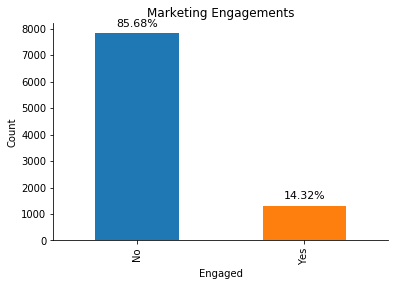

In [40]:
response_count= df.groupby("Response").count()["Customer"]
print(response_count)

#plot 
ax = response_count.plot(kind= "bar", title = "Marketing Engagements")
ax.set_xlabel("Engaged")
ax.set_ylabel( "Count")
annot_plot(ax)
plt.show()

### 1.2 Seperate by gender

In [31]:
by_gender = df.groupby(["Gender","Response"]).count()["Customer"]
by_gender

Gender  Response
F       No          3998
        Yes          660
M       No          3828
        Yes          648
Name: Customer, dtype: int64

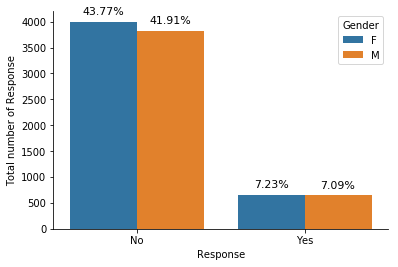

In [35]:
ax = sns.countplot("Response", hue = "Gender", data = df)
plt.ylabel("Total number of Response")
annot_plot(ax)
plt.show()

### 1.3 Seperare by Marial status

In [36]:
df.groupby(["Marital Status","Response"]).count()["Customer"]

Marital Status  Response
Divorced        No          1045
                Yes          324
Married         No          4602
                Yes          696
Single          No          2179
                Yes          288
Name: Customer, dtype: int64

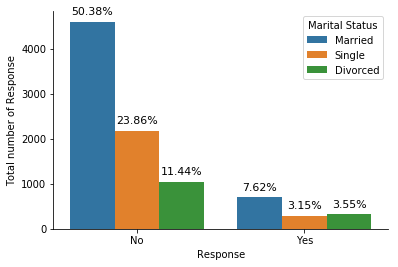

In [37]:
ax = sns.countplot("Response", hue = "Marital Status", data = df)
plt.ylabel('Total number of Response')
annot_plot(ax)
plt.show()

### 1.4 Seperate by Education


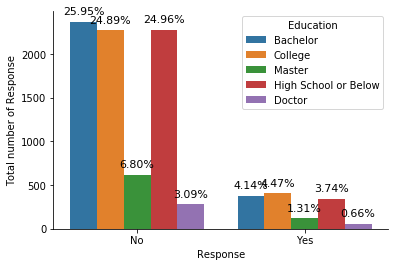

In [38]:
ax = sns.countplot('Response',hue = 'Education' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax)
plt.show()

# 2. Engagement rate by offer type

In [12]:
# Extract the Response data
response_df = df[df["Response"] == "Yes"]
response_df.shape

(1308, 26)

In [12]:
offer_type_df = response_df.groupby("Renew Offer Type").count()["Customer"]/df.groupby("Renew Offer Type").count()["Customer"]
offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

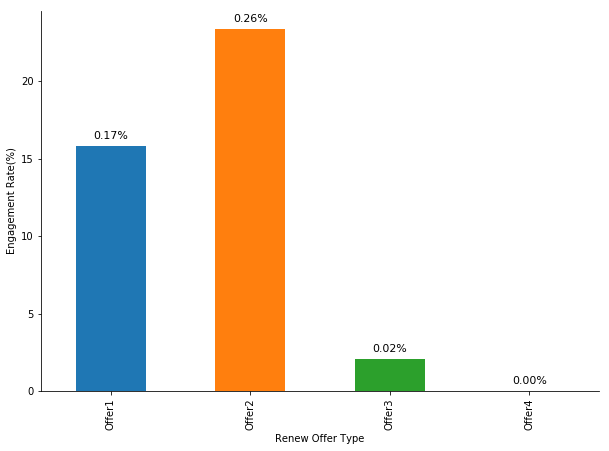

In [20]:
#Plot
ax = (offer_type_df*100.0).plot(kind = "bar", figsize= (10,7))
ax.set_ylabel("Engagement Rate(%)")
annot_plot(ax)
plt.show()

### 2.2 Engagement rate by offer type and vehicle

In [45]:
offer_vehicle_df = response_df.groupby(["Renew Offer Type", "Vehicle Class"]).count()["Customer"]/df.groupby("Renew Offer Type").count()["Customer"]
offer_vehicle_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

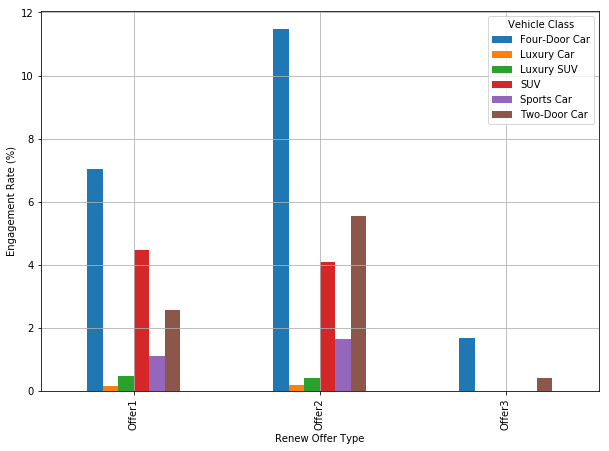

In [49]:
#Plot
ax = (offer_vehicle_df.unstack()*100.0).plot(kind = "bar", figsize= (10,7),grid = True)
ax.set_ylabel("Engagement Rate (%)")
plt.show()

# 3. Engagement rate by Sale Channel

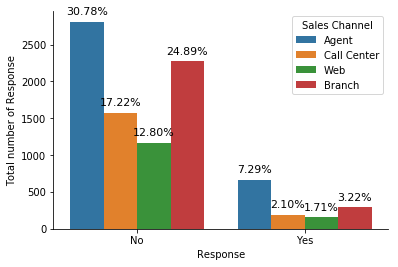

In [39]:
ax = sns.countplot('Response',hue = 'Sales Channel' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax)
plt.show()

In [54]:
sales_channel_df = response_df.groupby("Sales Channel").count()["Customer"]/ df.groupby("Sales Channel").count()["Customer"]
sales_channel_df


Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

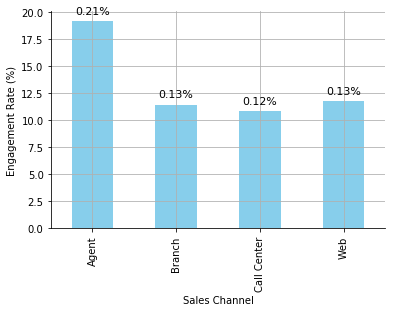

In [55]:
#Plot
ax = (sales_channel_df*100.0).plot(kind = "bar", color="skyblue",grid = True)
ax.set_ylabel("Engagement Rate (%)")
annot_plot(ax)
plt.show()

### 3.2 Engagement rate by Sales channel and vehicle

In [56]:
sales_vehicle_df =response_df.groupby(["Sales Channel", "Vehicle Size"]).count()["Customer"]/df.groupby("Sales Channel").count()["Customer"]
sales_vehicle_df
    

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

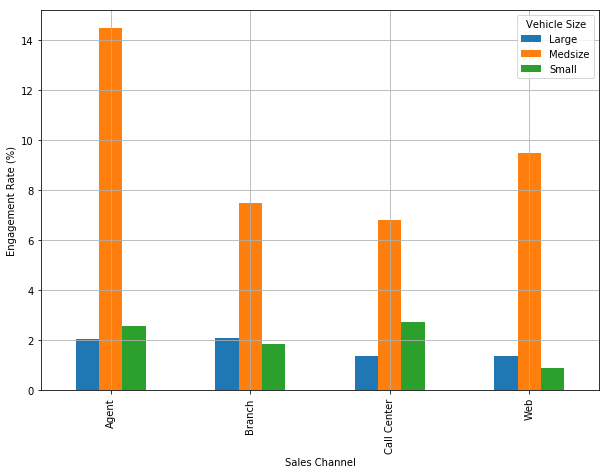

In [60]:
#Plot
ax = (sales_vehicle_df*100.0).unstack().plot(kind = "bar", grid = True, figsize= (10,7))
ax.set_ylabel("Engagement Rate (%)")
plt.show()


# 4. Segmenting customer base

In [3]:
df["Customer Lifetime Value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [4]:
df["Months Since Policy Inception"].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

### 4.1 Create segmentation

In [5]:
# Create CLV segmentation
df["CLV Segment"] = df["Customer Lifetime Value"].apply(lambda x: "High" if x > df["Customer Lifetime Value"].median() else "Low")


In [6]:
# Create Policy age segmentation
df["Policy Age Segment"] = df["Months Since Policy Inception"].apply(lambda x: "High" if x > df["Months Since Policy Inception"].median() else "Low")


### 4.2 Visualize customer segmentation

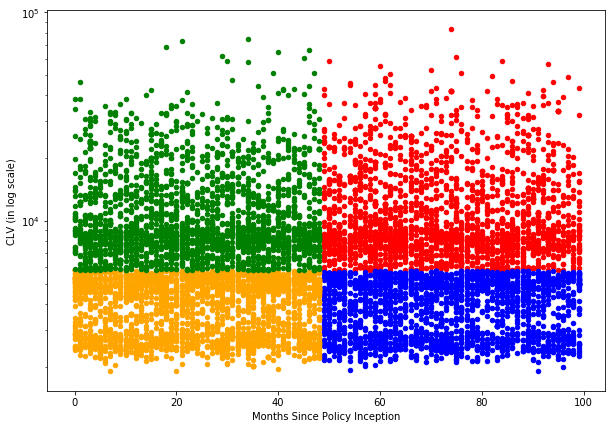

In [7]:
# Visualize with Customer Lifetime Value and Policy Age sementations

ax = df[(df["CLV Segment"] == "High") & (df["Policy Age Segment"] == "High")].plot.scatter(color ="red", x= "Months Since Policy Inception",
    y="Customer Lifetime Value", logy=True, figsize= (10,7)) # logy transfrom the scale to log with very high monetary values

df[(df["CLV Segment"] == "Low") & (df["Policy Age Segment"] == "High")].plot.scatter(ax=ax, color ="blue", x= "Months Since Policy Inception",
    y="Customer Lifetime Value",logy=True)

df[(df["CLV Segment"] == "Low") & (df["Policy Age Segment"] == "Low")].plot.scatter(ax=ax, color ="orange", x= "Months Since Policy Inception",
    y="Customer Lifetime Value",logy=True)

df[(df["CLV Segment"] == "High") & (df["Policy Age Segment"] == "Low")].plot.scatter(ax=ax, color ="green", x= "Months Since Policy Inception",
    y="Customer Lifetime Value",logy=True)

ax.set_ylabel("CLV (in log scale)")
ax.set_xlabel("Months Since Policy Inception")
plt.show()


### 4.3 Engagement Rate by segmenation 

In [14]:
engagement_by_segment = response_df.groupby(["CLV Segment","Policy Age Segment"]).count()["Customer"]/df.groupby(["CLV Segment","Policy Age Segment"]).count()["Customer"]

engagement_by_segment.unstack()

Policy Age Segment,High,Low
CLV Segment,,
High,0.138728,0.132067
Low,0.162450,0.139957
